In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Arial'],#['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

# S1. details of subdataset

In [2]:
data = np.load('./Step4_DNN-alldata/databygroup.npy',allow_pickle=True).tolist()
datamaxmin=np.load('./Step4_DNN-alldata/databygroup_maxmin.npy',allow_pickle=True).tolist()
time_step = np.load('./Step1_datasplit/split_data_log.npy',allow_pickle=True).tolist()

od = pd.read_csv('./Step1_datasplit/data/data.csv')

dmax = np.round(datamaxmin['max'][[-5,-4,-3,-2,-1]],2)
dmin = np.round(datamaxmin['min'][[-5,-4,-3,-2,-1]],2)
dmid = np.round((dmax+dmin)/2,2)

In [18]:
table = []

for k in data.keys():
    tem = [k]
    tem.append(time_step[k][1] - time_step[k][0])
    tem.append(od['time'].iloc[time_step[k][0]]+od['time'].iloc[time_step[k][1]])

    table.append(tem)

pd.DataFrame(table).to_csv('Table_subdata.csv')
    

In [3]:
# ALL DATA
#聚类筛选的数据，从step5-1中直接复制
TrainData = {}
for k in data.keys():
    TrainData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(int(0.8*TrainData[k].shape[0])-step-1):
        xtrain.append(TrainData[k][i,:TrainData[k].shape[1]-5].tolist())
        ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print(xtrain.shape,ytrain.shape)

(34684, 15) (34684, 5)


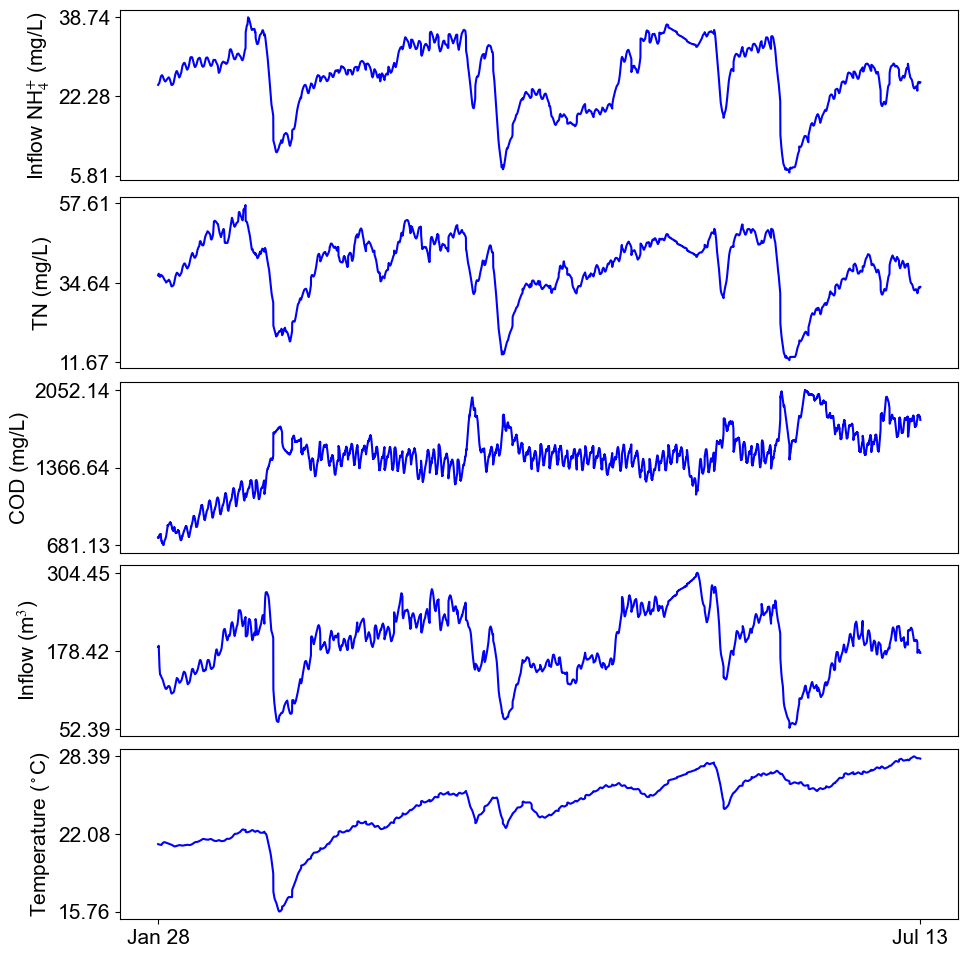

In [ ]:
# Fig.S1
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(18,18)
                )
gs = GridSpec(10, 2, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

alphas = [1,0.8,0.8,0.4]
colors = ['#015482', '#61DE45', '#DEA13A', '#ff474c']#'#DE66C2''#5096DE'
colormap = plt.get_cmap('bwr')
colors   = colormap(np.linspace(0, 2, 8)).tolist() # 按百分比

data_maxmin = np.load('./Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'],2)
dmin = np.round(data_maxmin['min'],2)
dmid = np.round((dmax+dmin)/2,2)

# input data
ylabels = ['Inflow NH$_{4}^{+}$ (mg/L)','TN (mg/L)','COD (mg/L)','Inflow (m$^{3}$)', 'Temperature ($^\circ$C)']
tick_size=15
label_size=15
for k in range(5):
    ax = fig.add_subplot(gs[k, 0])
    ax.plot(xtrain[:,k], alpha=alphas[0], color=colors[0], label='True')
    ax.set_ylabel(ylabels[k],fontsize=label_size)
    ax.set_yticks([-1,0,1],[dmin[k],dmid[k],dmax[k]],fontsize=tick_size)
    if k < 4:
        ax.set_xticks([])
    else:
        ax.set_xticks([0,xtrain.shape[0]],['Jan 28','Jul 13'],fontsize=tick_size)

plt.savefig('./S1_input.png',dpi=200,bbox_inches='tight')

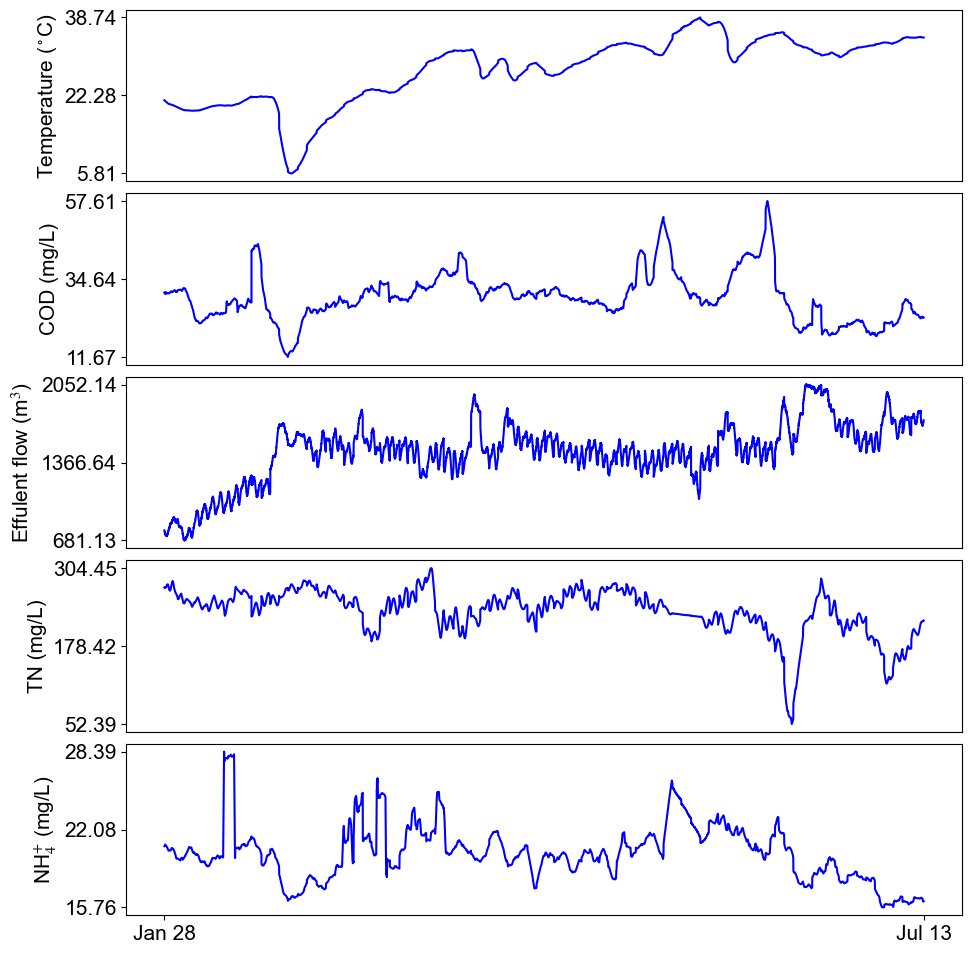

In [45]:
# Fig.S2
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(18,18)
                )
gs = GridSpec(10, 2, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

alphas = [1,0.8,0.8,0.4]
colors = ['#015482', '#61DE45', '#DEA13A', '#ff474c']#'#DE66C2''#5096DE'
colormap = plt.get_cmap('bwr')
colors   = colormap(np.linspace(0, 2, 8)).tolist() # 按百分比

data_maxmin = np.load('./Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'],2)
dmin = np.round(data_maxmin['min'],2)
dmid = np.round((dmax+dmin)/2,2)

# output data
ylabels = ['Temperature ($^\circ$C)','COD (mg/L)','Effulent flow (m$^{3}$)', 'TN (mg/L)','NH$_{4}^{+}$ (mg/L)']
tick_size=15
label_size=15
for k in range(5):
    ax = fig.add_subplot(gs[k, 0])
    ax.plot(ytrain[:,k], alpha=alphas[0], color=colors[0], label='True')
    ax.set_ylabel(ylabels[k],fontsize=label_size)
    ax.set_yticks([-1,0,1],[dmin[k],dmid[k],dmax[k]],fontsize=tick_size)
    if k < 4:
        ax.set_xticks([])
    else:
        ax.set_xticks([0,xtrain.shape[0]],['Jan 28','Jul 13'],fontsize=tick_size)

plt.savefig('./S2_output.png',dpi=200,bbox_inches='tight')

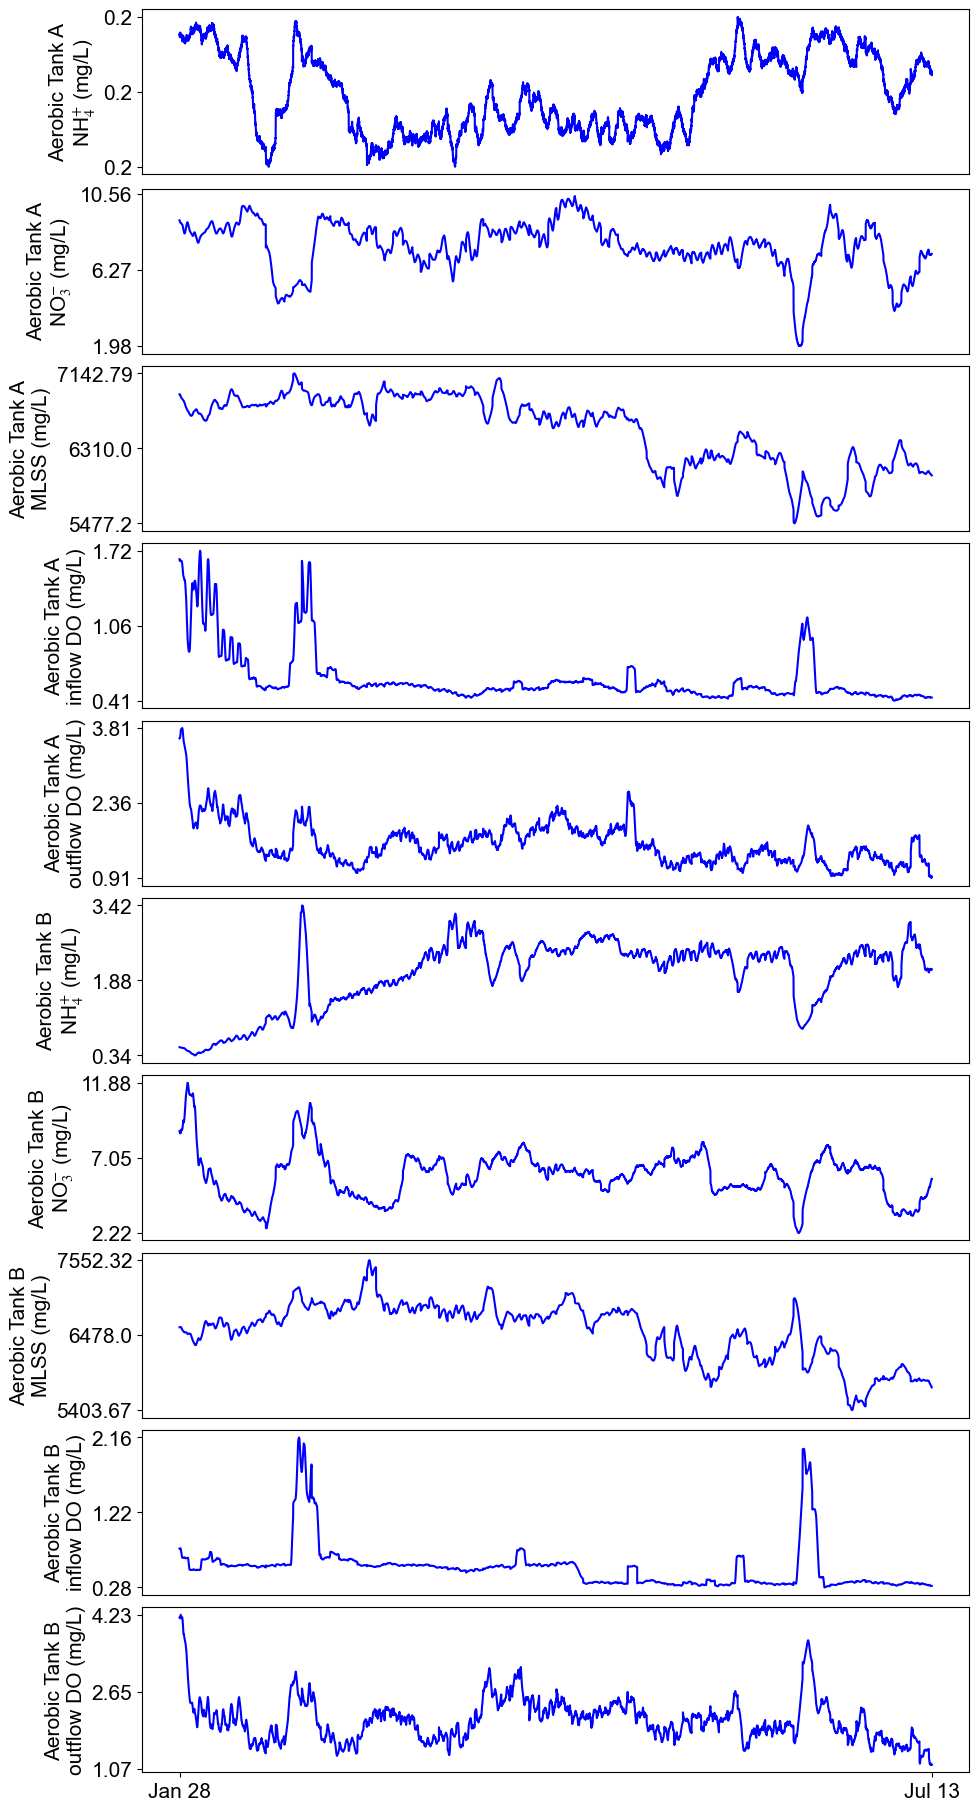

In [4]:
# Fig.S3
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(18,18)
                )
gs = GridSpec(10, 2, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

alphas = [1,0.8,0.8,0.4]
colors = ['#015482', '#61DE45', '#DEA13A', '#ff474c']#'#DE66C2''#5096DE'
colormap = plt.get_cmap('bwr')
colors   = colormap(np.linspace(0, 2, 8)).tolist() # 按百分比

data_maxmin = np.load('./Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'],2)
dmin = np.round(data_maxmin['min'],2)
dmid = np.round((dmax+dmin)/2,2)

# output data
ylabels = [
    'Aerobic Tank A'+'\n'+'NH$_{4}^{+}$ (mg/L)',
    'Aerobic Tank A'+'\n'+'NO$_{3}^{-}$ (mg/L)',
    'Aerobic Tank A'+'\n'+'MLSS (mg/L)',
    'Aerobic Tank A'+'\n'+'inflow DO (mg/L)',
    'Aerobic Tank A'+'\n'+'outflow DO (mg/L)',
    'Aerobic Tank B'+'\n'+'NH$_{4}^{+}$ (mg/L)',
    'Aerobic Tank B'+'\n'+'NO$_{3}^{-}$ (mg/L)',
    'Aerobic Tank B'+'\n'+'MLSS (mg/L)',
    'Aerobic Tank B'+'\n'+'inflow DO (mg/L)',
    'Aerobic Tank B'+'\n'+'outflow DO (mg/L)',
]
tick_size=15
label_size=15

ind = [5,6,7,8,9,10,11,12,13,14]

for k in range(10):
    ax = fig.add_subplot(gs[k, 0])
    ax.plot(xtrain[:,ind[k]], alpha=alphas[0], color=colors[0], label='True')
    ax.set_ylabel(ylabels[k],fontsize=label_size)
    ax.set_yticks([-1,0,1],[dmin[ind[k]],dmid[ind[k]],dmax[ind[k]]],fontsize=tick_size)
    if k < 9:
        ax.set_xticks([])
    else:
        ax.set_xticks([0,xtrain.shape[0]],['Jan 28','Jul 13'],fontsize=tick_size)

plt.savefig('./S3_state.png',dpi=200,bbox_inches='tight')

# S3. Category information

In [3]:
from joblib import dump
from joblib import load
from sklearn.cluster import DBSCAN

In [4]:
# 加载模型
clustering = load('./Step3_dataselect/clustering_model.joblib')
print(clustering.labels_,clustering.labels_.shape)

td = np.load('./Step3_dataselect/databygroup.npy',allow_pickle=True).tolist()

[ 0  1  2  3  4  5  6  6  7  8  2  9 10 11 12  2 11 13 14 15  2 16 11 11
 13 14 17 11  1  6 18 19 11 11 18 20  2 21  2 22  6  6  1 18 23  2 24 25
 26 27 11 28 29 30  2  2 31  2 18 32  2 33 11 26  2 11  2 11 11  2 34  2
  2  2 35] (75,)


In [5]:
# 每个类里面有多少个数据，按数据比例画饼
GROUPED_DATA = {}
for k in clustering.labels_:
    GROUPED_DATA[k] = 0

GROUPED_sub = {}
for k in clustering.labels_:
    GROUPED_sub[k] = []


# 所有原始数据
ALLDATA = []
for k in td.keys():
    ALLDATA.append(td[k])

print('检查subdata和对应的分类是否对上',len(ALLDATA),clustering.labels_.shape[0])

for i in range(clustering.labels_.shape[0]):
    GROUPED_DATA[clustering.labels_[i]] += ALLDATA[i].shape[0]
    GROUPED_sub[clustering.labels_[i]].append(i)

labels = list(GROUPED_DATA.keys())
sizes = list(GROUPED_DATA.values())

检查subdata和对应的分类是否对上 75 75


In [13]:
table = []
for i in range(len(sizes)):
    tem = [str(sizes[i])+', '+str(100*np.round(sizes[i]/np.sum(sizes),4))+'%', GROUPED_sub[i]]
    table.append(tem)

pd.DataFrame(table).to_csv('./Table_category.csv')

# S5. Data Distribution

In [17]:
import seaborn as sns

In [ ]:
data = np.load('./Step4_DNN-alldata/databygroup.npy',allow_pickle=True).tolist()

# ALL DATA
#聚类筛选的数据，从step5-1中直接复制
TrainData = {}
for k in data.keys():
    TrainData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(int(0.8*TrainData[k].shape[0])-step-1):
        xtrain.append(TrainData[k][i,:TrainData[k].shape[1]-5].tolist())
        ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print(xtrain.shape,ytrain.shape)


# Selected DATA #######################################################################################
selected_dataid = ['historydata', 'sub3', 'sub4', 'sub5', 'sub8', 'sub9', 'sub11', 'sub12', 'sub14', 
                   'sub19', 'sub21', 'sub24', 'sub25', 'sub26', 'sub31', 'sub35', 'sub37', 'sub39', 
                   'sub41', 'sub42', 'sub44', 'sub46', 'sub47', 'sub49', 'sub51', 'sub52', 'sub53', 
                   'sub56', 'sub58', 'sub59', 'sub61', 'sub63', 'sub68', 'sub70', 'sub73', 'sub74']

TrainData = {}
for k in selected_dataid:
    TrainData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
sxtrain,sytrain=[],[]
for k in TrainData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        sxtrain.append(TrainData[k][i,:TrainData[k].shape[1]-5].tolist())
        sytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
sxtrain = np.array(sxtrain)
sytrain = np.array(sytrain)
print(sxtrain.shape,sytrain.shape)

# Scenario DATA #######################################################################################
TrainData = {}
for k in data.keys():
    TrainData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
cxtrain,cytrain=[],[]
for k in TrainData.keys():
    for i in range(int(0.8*TrainData[k].shape[0])-step-1):
        cxtrain.append(TrainData[k][i,:TrainData[k].shape[1]-5].tolist())
        cytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())

cxtrain = np.array(cxtrain)
cytrain = np.array(cytrain)


# data前4个feature分别为in NH4、TN、flow、COD、T，由此选TN and COD分类
# 找最大最小值

# 各分5份，构造选数据条件
n = 5
TNrange = np.linspace(np.max(xtrain[:,1]),np.min(xtrain[:,1]),n+1)
CODrange = np.linspace(np.max(xtrain[:,3]),np.min(xtrain[:,3]),n+1)

# 根据上述条件分数据，一共有25组数据
# 因为数据为20个时间步一条，所以用20个时间步的平均值作为分类条件

group_datax, group_datay = {}, {}

for TNid in range(len(TNrange)-1):
    for CODid in range(len(CODrange)-1):
        group_datax['TN'+str(TNid)+'_COD'+str(CODid)] = []
        group_datay['TN'+str(TNid)+'_COD'+str(CODid)] = []


for i in range(xtrain.shape[0]):
    meanTN, meanCOD = np.mean(xtrain[i,1]), np.mean(xtrain[i,3])
    logTN, logCOD = 0, 0
    # TN
    if meanTN == TNrange[0]:
        logTN = 0
    else:
        for k in range(len(TNrange)-1):
            if meanTN < TNrange[k] and meanTN >= TNrange[k+1]:
                logTN = k
    # COD
    if meanCOD == CODrange[0]:
        logCOD = 0
    else:
        for k in range(len(CODrange)-1):
            if meanCOD < CODrange[k] and meanCOD >= CODrange[k+1]:
                logCOD = k
    group_datax['TN'+str(logTN)+'_COD'+str(logCOD)].append(xtrain[i,:].tolist())
    group_datay['TN'+str(logTN)+'_COD'+str(logCOD)].append(ytrain[i,:].tolist())
    
# 删除没有数据的分组
logk = []
for k in group_datay.keys():
    if len(group_datay[k]) == 0:
        logk.append(k)

for k in logk:
    group_datax.pop(k)
    group_datay.pop(k)

# 从上述每个分组中选出代表性数据
# 在保证选出数据总数与Koopman方法一致的前提下，按照各个分类的比例选数据
# K方法选出的数据总共有 23032 条
# 确定每个分类的比例
num = {}
sumk = 0
for k in group_datay.keys():
    num[k] = len(group_datay[k])
    sumk += len(group_datay[k])

for k in group_datay.keys():
    num[k] = int(23032*num[k]/sumk)

cxtrain, cytrain = [], []
for k in group_datax.keys():
    for i in range(num[k]):
        cxtrain.append(group_datax[k][i])
        cytrain.append(group_datay[k][i])

cxtrain = np.array(cxtrain)
cytrain = np.array(cytrain)
print(cxtrain.shape,cytrain.shape)

(34684, 15) (34684, 5)
(23032, 15) (23032, 5)
(23021, 15) (23021, 5)


In [ ]:
datamaxmin=np.load('./Step4_DNN-alldata/databygroup_maxmin.npy',allow_pickle=True).tolist()

dmax = np.round(datamaxmin['max'][:15],2)
dmin = np.round(datamaxmin['min'][:15],2)
dmid = np.round((dmax+dmin)/2,2)

y = (xtrain+1)*0.5*(dmax-dmin)+dmin
sy = (sxtrain+1)*0.5*(dmax-dmin)+dmin
cy = (cxtrain+1)*0.5*(dmax-dmin)+dmin

print(np.mean(y,axis=0))
print(np.mean(sy,axis=0))
print(np.mean(cy,axis=0))
print('########################################################')
print(np.var(y,axis=0))
print(np.var(sy,axis=0))
print(np.var(cy,axis=0))
print('########################################################')
print(np.median(y,axis=0))
print(np.median(sy,axis=0))
print(np.median(cy,axis=0))

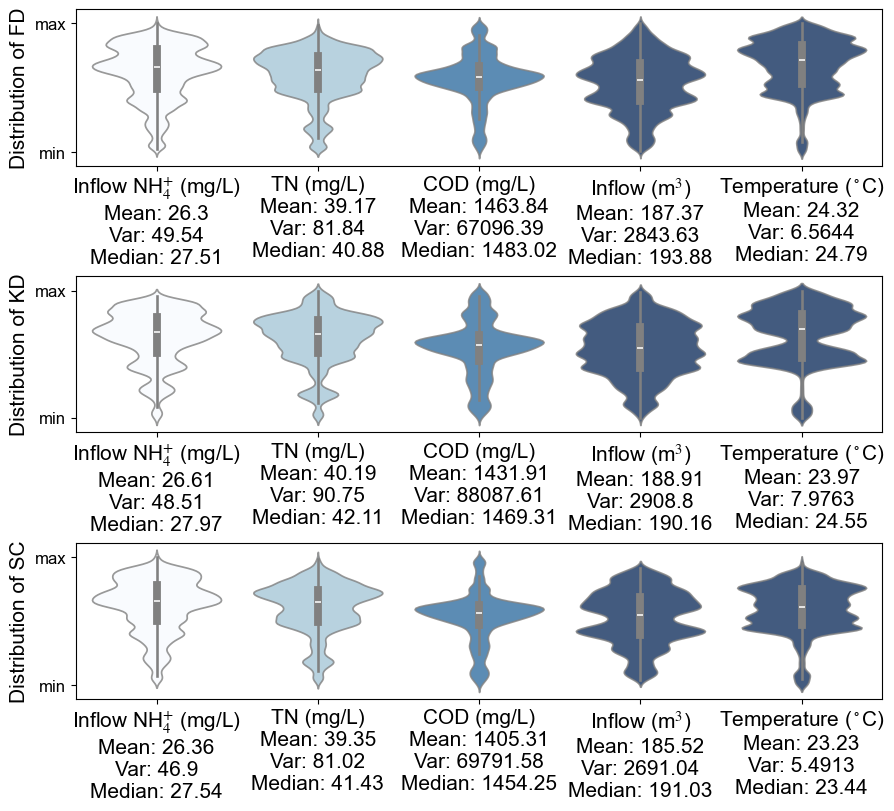

In [46]:
# INPUT DATA
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(25,8)
                )
gs = GridSpec(3, 3, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

alphas = [0.8, 0.4, 0.4, 0.4]
colors = ['#015482', '#61DE45', '#DEA13A', '#ff474c']#'#DE66C2''#5096DE'
label_size = 15
xticks_size = 15
colormap = plt.get_cmap('Blues')
colors   = colormap(np.linspace(0, 1.5, 5)).tolist() # 按百分比

ylabelsFD = ['Inflow NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[0],2))  + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[0],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[0],2)),
             'TN (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[1],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[1],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[1],2)),
             'COD (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[2],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[2],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[2],2)), 
             'Inflow (m$^{3}$)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[3],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[3],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[3],2)),
             'Temperature ($^\circ$C)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[4],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[4],4)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[4],2)),
             ]

ylabelsKD = ['Inflow NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[0],2))  + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[0],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[0],2)),
             'TN (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[1],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[1],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[1],2)),
             'COD (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[2],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[2],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[2],2)), 
             'Inflow (m$^{3}$)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[3],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[3],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[3],2)),
             'Temperature ($^\circ$C)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[4],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[4],4)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[4],2)),
             ]

ylabelsSC = ['Inflow NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[0],2))  + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[0],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[0],2)),
             'TN (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[1],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[1],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[1],2)),
             'COD (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[2],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[2],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[2],2)), 
             'Inflow (m$^{3}$)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[3],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[3],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[3],2)),
             'Temperature ($^\circ$C)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[4],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[4],4)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[4],2)),
             ]

fontsizes = [12, 12, 15]

data_maxmin = np.load('./Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'][:5],2)
dmin = np.round(data_maxmin['min'][:5],2)
dmid = np.round((dmax+dmin)/2,2)

dy1 = pd.DataFrame(xtrain[:,:5],columns=['a','b','c','d','e'])
dy2 = pd.DataFrame(sxtrain[:,:5],columns=['a','b','c','d','e'])
dy3 = pd.DataFrame(cxtrain[:,:5],columns=['a','b','c','d','e'])


ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=dy1, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_xticks([])
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsFD,fontsize = xticks_size)
ax.set_ylabel('Distribution of FD',fontsize = label_size)

ax = fig.add_subplot(gs[1, 0])
sns.violinplot(data=dy2, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_xticks([])
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsKD,fontsize = xticks_size)
ax.set_ylabel('Distribution of KD',fontsize = label_size)

ax = fig.add_subplot(gs[2, 0])
sns.violinplot(data=dy3, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsSC,fontsize = xticks_size)
ax.set_ylabel('Distribution of SC',fontsize = label_size)

plt.savefig('./SI_INPUT_DATA_dis.png',dpi=300,bbox_inches='tight')


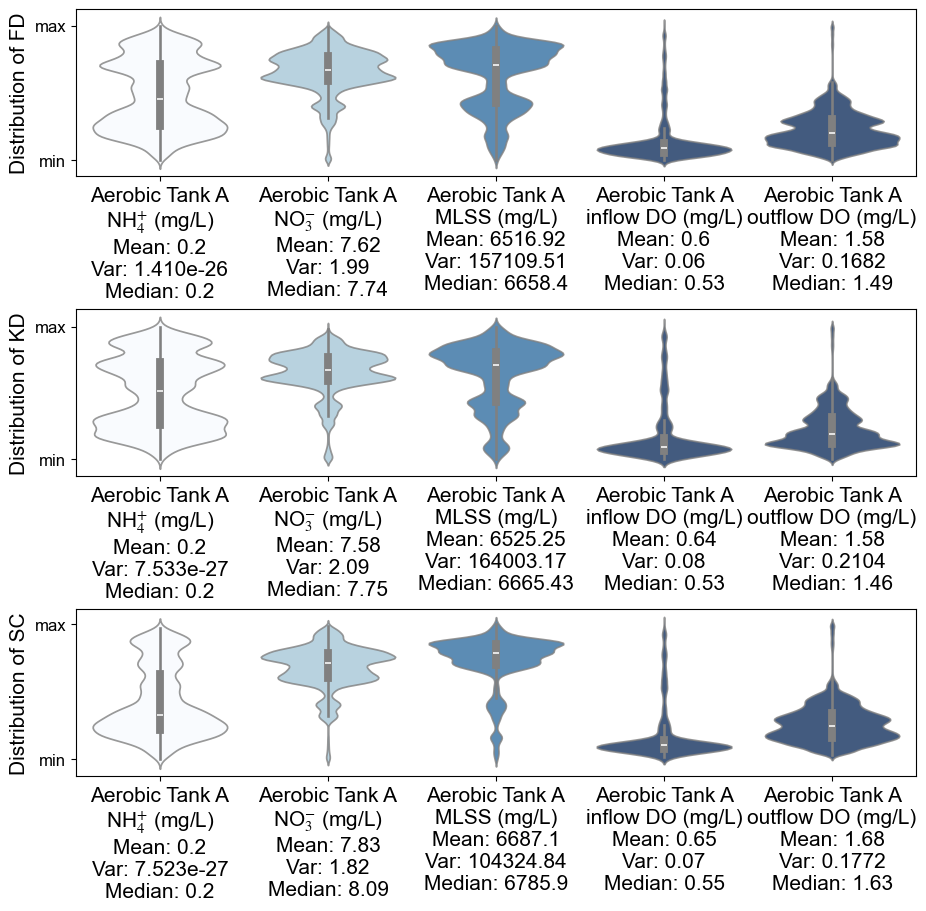

In [49]:
# STATE PART I: TANK A
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(26,9)
                )
gs = GridSpec(3, 3, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

alphas = [0.8, 0.4, 0.4, 0.4]
label_size = 15
xticks_size = 15
colormap = plt.get_cmap('Blues')
colors   = colormap(np.linspace(0, 1.5, 5)).tolist() # 按百分比

k = 5 # TANK A从5开始

ylabelsFD = ['Aerobic Tank A'+'\n'+'NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[0+k],2))  + '\n' \
                + 'Var: '+str("{:.3e}".format(np.var(y,axis=0)[0+k])) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[0+k],2)),
             'Aerobic Tank A'+'\n'+'NO$_{3}^{-}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[1+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[1+k],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[1+k],2)),
             'Aerobic Tank A'+'\n'+'MLSS (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[2+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[2+k],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[2+k],2)), 
             'Aerobic Tank A'+'\n'+'inflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[3+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[3+k],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[3+k],2)),
             'Aerobic Tank A'+'\n'+'outflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[4+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[4+k],4)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[4+k],2)),
             ]

ylabelsKD = ['Aerobic Tank A'+'\n'+'NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[0+k],2))  + '\n' \
                + 'Var: '+str("{:.3e}".format(np.var(sy,axis=0)[0+k])) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[0+k],2)),
             'Aerobic Tank A'+'\n'+'NO$_{3}^{-}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[1+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[1+k],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[1+k],2)),
             'Aerobic Tank A'+'\n'+'MLSS (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[2+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[2+k],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[2+k],2)), 
             'Aerobic Tank A'+'\n'+'inflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[3+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[3+k],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[3+k],2)),
             'Aerobic Tank A'+'\n'+'outflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[4+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[4+k],4)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[4+k],2)),
             ]

ylabelsSC = ['Aerobic Tank A'+'\n'+'NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[0+k],2))  + '\n' \
                + 'Var: '+str("{:.3e}".format(np.var(cy,axis=0)[0+k])) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[0+k],2)),
             'Aerobic Tank A'+'\n'+'NO$_{3}^{-}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[1+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[1+k],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[1+k],2)),
             'Aerobic Tank A'+'\n'+'MLSS (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[2+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[2+k],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[2+k],2)), 
             'Aerobic Tank A'+'\n'+'inflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[3+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[3+k],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[3+k],2)),
             'Aerobic Tank A'+'\n'+'outflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[4+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[4+k],4)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[4+k],2)),
             ]

fontsizes = [12, 12, 15]

data_maxmin = np.load('./Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'][:5],2)
dmin = np.round(data_maxmin['min'][:5],2)
dmid = np.round((dmax+dmin)/2,2)

dy1 = pd.DataFrame(xtrain[:,k:k+5],columns=['a','b','c','d','e'])
dy2 = pd.DataFrame(sxtrain[:,k:k+5],columns=['a','b','c','d','e'])
dy3 = pd.DataFrame(cxtrain[:,k:k+5],columns=['a','b','c','d','e'])


ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=dy1, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_xticks([])
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsFD,fontsize = xticks_size)
ax.set_ylabel('Distribution of FD',fontsize = label_size)

ax = fig.add_subplot(gs[1, 0])
sns.violinplot(data=dy2, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_xticks([])
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsKD,fontsize = xticks_size)
ax.set_ylabel('Distribution of KD',fontsize = label_size)

ax = fig.add_subplot(gs[2, 0])
sns.violinplot(data=dy3, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsSC,fontsize = xticks_size)
ax.set_ylabel('Distribution of SC',fontsize = label_size)

plt.savefig('./SI_STATEA_DATA_dis.png',dpi=300,bbox_inches='tight')


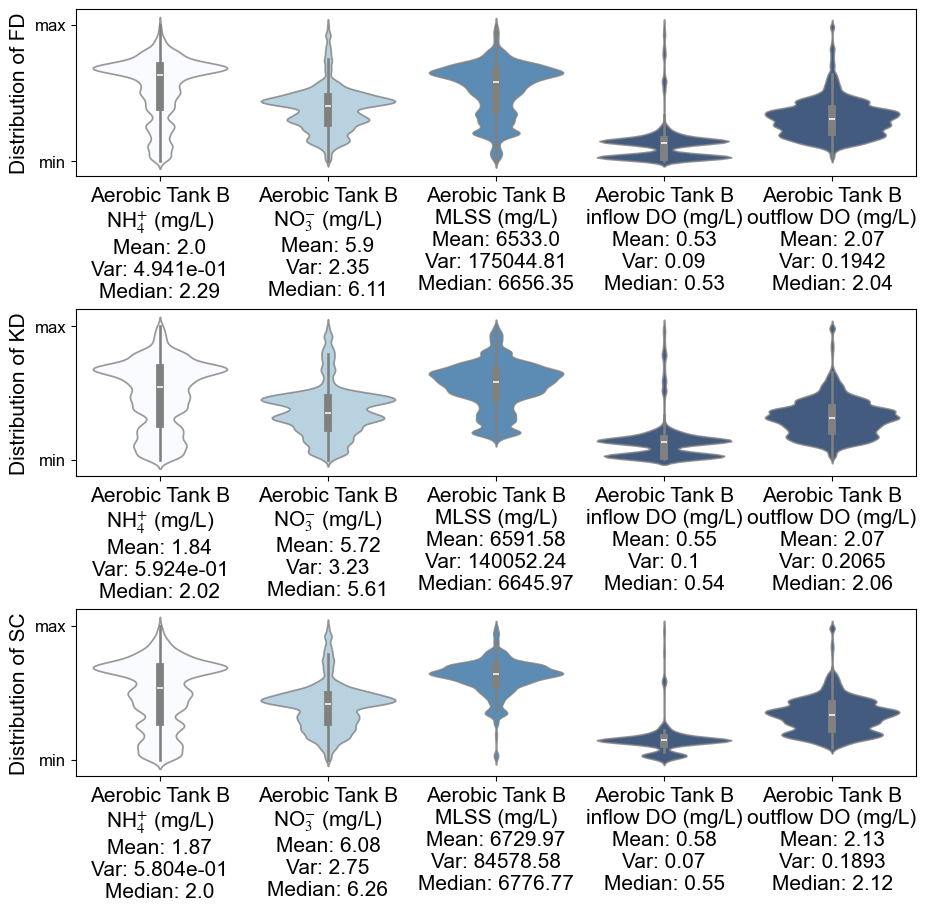

In [50]:
# STATE PART I: TANK B
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(26,9)
                )
gs = GridSpec(3, 3, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

alphas = [0.8, 0.4, 0.4, 0.4]
label_size = 15
xticks_size = 15
colormap = plt.get_cmap('Blues')
colors   = colormap(np.linspace(0, 1.5, 5)).tolist() # 按百分比

k = 10 # TANK B从10开始

ylabelsFD = ['Aerobic Tank B'+'\n'+'NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[0+k],2))  + '\n' \
                + 'Var: '+str("{:.3e}".format(np.var(y,axis=0)[0+k])) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[0+k],2)),
             'Aerobic Tank B'+'\n'+'NO$_{3}^{-}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[1+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[1+k],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[1+k],2)),
             'Aerobic Tank B'+'\n'+'MLSS (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[2+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[2+k],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[2+k],2)), 
             'Aerobic Tank B'+'\n'+'inflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[3+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[3+k],2)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[3+k],2)),
             'Aerobic Tank B'+'\n'+'outflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(y,axis=0)[4+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(y,axis=0)[4+k],4)) + '\n' + 'Median: '+str(np.round(np.median(y,axis=0)[4+k],2)),
             ]

ylabelsKD = ['Aerobic Tank B'+'\n'+'NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[0+k],2))  + '\n' \
                + 'Var: '+str("{:.3e}".format(np.var(sy,axis=0)[0+k])) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[0+k],2)),
             'Aerobic Tank B'+'\n'+'NO$_{3}^{-}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[1+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[1+k],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[1+k],2)),
             'Aerobic Tank B'+'\n'+'MLSS (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[2+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[2+k],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[2+k],2)), 
             'Aerobic Tank B'+'\n'+'inflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[3+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[3+k],2)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[3+k],2)),
             'Aerobic Tank B'+'\n'+'outflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(sy,axis=0)[4+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(sy,axis=0)[4+k],4)) + '\n' + 'Median: '+str(np.round(np.median(sy,axis=0)[4+k],2)),
             ]

ylabelsSC = ['Aerobic Tank B'+'\n'+'NH$_{4}^{+}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[0+k],2))  + '\n' \
                + 'Var: '+str("{:.3e}".format(np.var(cy,axis=0)[0+k])) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[0+k],2)),
             'Aerobic Tank B'+'\n'+'NO$_{3}^{-}$ (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[1+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[1+k],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[1+k],2)),
             'Aerobic Tank B'+'\n'+'MLSS (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[2+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[2+k],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[2+k],2)), 
             'Aerobic Tank B'+'\n'+'inflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[3+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[3+k],2)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[3+k],2)),
             'Aerobic Tank B'+'\n'+'outflow DO (mg/L)' + '\n' + 'Mean: '+str(np.round(np.mean(cy,axis=0)[4+k],2)) + '\n' \
                + 'Var: '+str(np.round(np.var(cy,axis=0)[4+k],4)) + '\n' + 'Median: '+str(np.round(np.median(cy,axis=0)[4+k],2)),
             ]

fontsizes = [12, 12, 15]

data_maxmin = np.load('./Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'][:5],2)
dmin = np.round(data_maxmin['min'][:5],2)
dmid = np.round((dmax+dmin)/2,2)

dy1 = pd.DataFrame(xtrain[:,k:k+5],columns=['a','b','c','d','e'])
dy2 = pd.DataFrame(sxtrain[:,k:k+5],columns=['a','b','c','d','e'])
dy3 = pd.DataFrame(cxtrain[:,k:k+5],columns=['a','b','c','d','e'])


ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=dy1, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_xticks([])
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsFD,fontsize = xticks_size)
ax.set_ylabel('Distribution of FD',fontsize = label_size)

ax = fig.add_subplot(gs[1, 0])
sns.violinplot(data=dy2, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_xticks([])
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsKD,fontsize = xticks_size)
ax.set_ylabel('Distribution of KD',fontsize = label_size)

ax = fig.add_subplot(gs[2, 0])
sns.violinplot(data=dy3, palette=colors, edgecolor="gray", alpha=0.8)
ax.set_yticks([-1,1],['min','max'])
ax.set_xticks([0,1,2,3,4],ylabelsSC,fontsize = xticks_size)
ax.set_ylabel('Distribution of SC',fontsize = label_size)

plt.savefig('./SI_STATEB_DATA_dis.png',dpi=300,bbox_inches='tight')
